## Intern : AI / ML Internship

---

A.Jafflet Trinishia

***Brainwave Matrix solutions***

In [11]:
#Imports Pandas for data handling, Seaborn for statistical visualizations, and Matplotlib for detailed plot customization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
data = pd.read_csv('News.csv',index_col=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [15]:
data.shape


(44919, 5)

In [16]:
# Removes the columns title, subject, and date from the DataFrame `df` along the horizontal axis (axis=1)
data = data.drop(["title", "subject","date"], axis = 1)


In [17]:
#eturns the count of missing "null" values for each column in the DataFrame
data.isnull().sum()


,0
text,0
class,0


In [18]:
# Shuffles the rows of data, resets the index, and removes the temporary "index" column
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)


<Axes: xlabel='class', ylabel='count'>

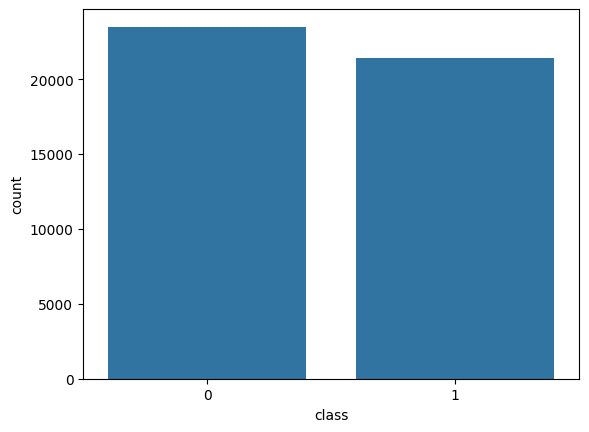

In [19]:
#Creates a count plot of the 'class' column in `data`, ordered by the frequency of each class
sns.countplot(data=data,
			x='class',
			order=data['class'].value_counts().index)

In [20]:
#importing necessary files
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
#This function removes punctuation, converts text to lowercase, and filters out stopwords from a list of sentences, returning the cleaned text.def preprocess_text(text_data):
def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text

In [22]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 44919/44919 [33:53<00:00, 22.09it/s]


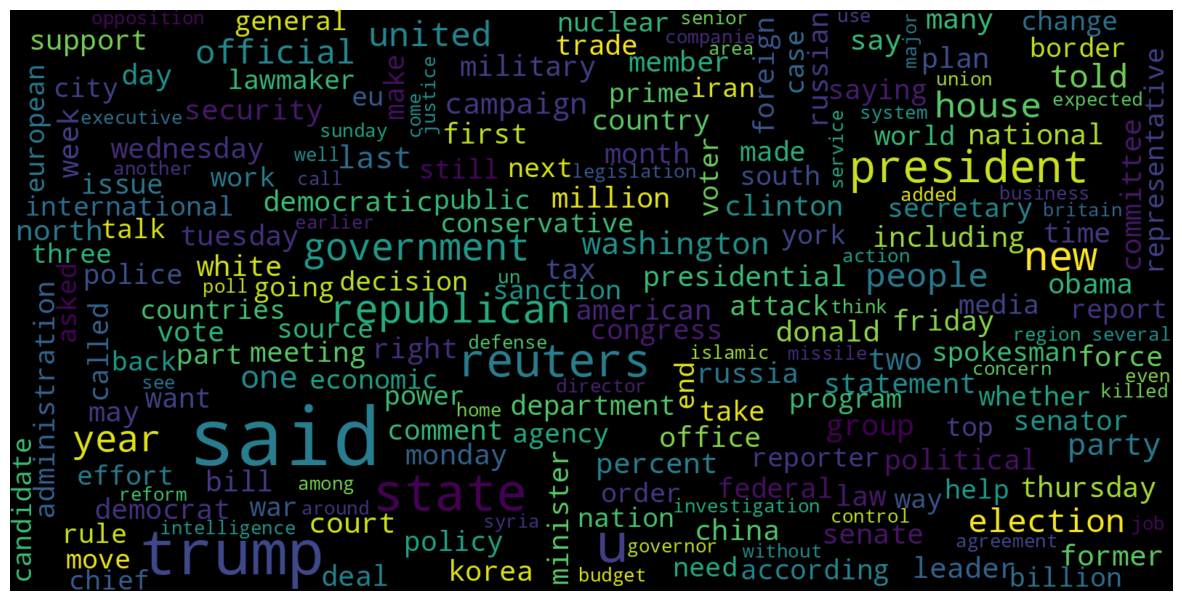

In [23]:
# Generates and displays a word cloud for the text data where 'class' is 1, highlighting the most frequent words
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

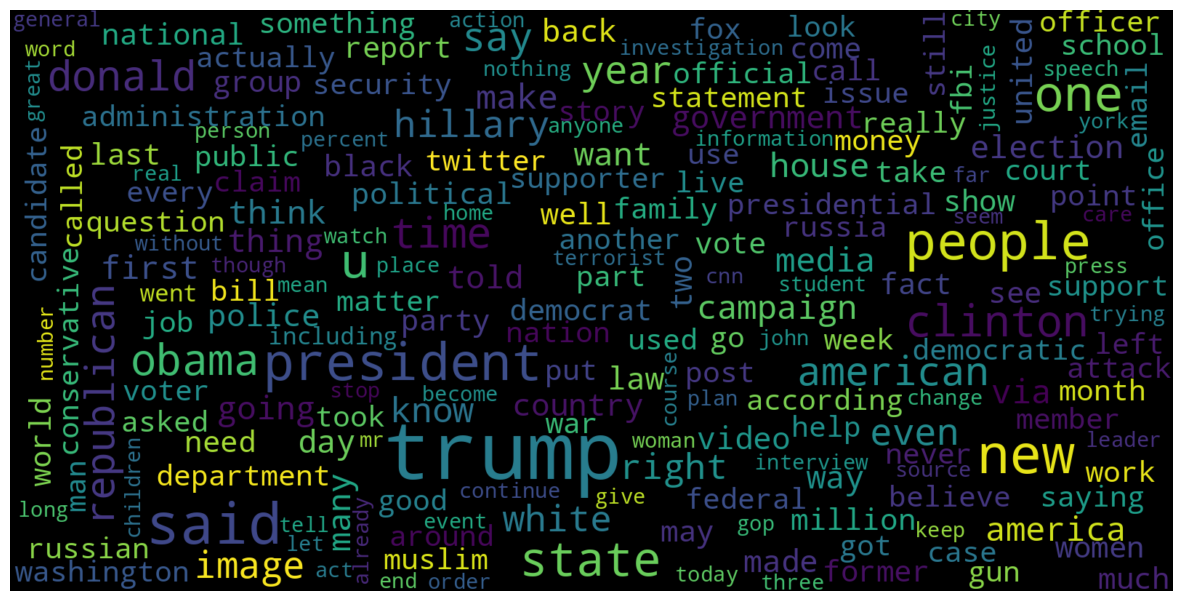

In [24]:
# This generates and displays a word cloud for the text data where the class is 0, highlighting the most frequent words
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

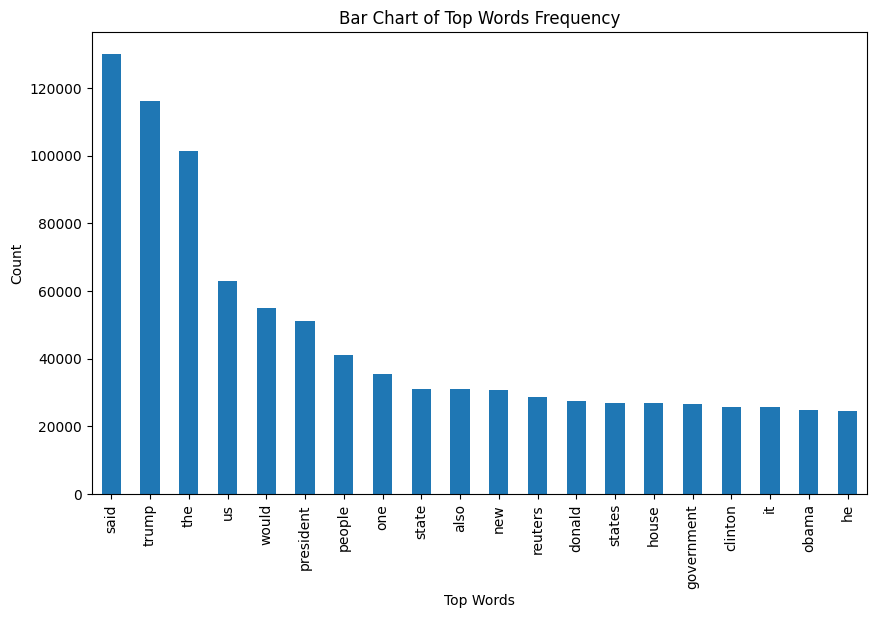

In [25]:
#Extracts top 20 most frequent words from the data['text'] column and visualizes their frequency in a bar chart
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
	vec = CountVectorizer().fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx])
				for word, idx in vec.vocabulary_.items()]
	words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)
	return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)

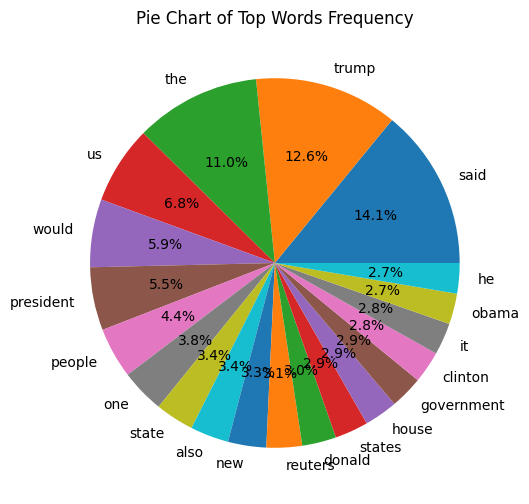

In [26]:
df1.groupby('Review').sum()['count'].sort_values(ascending=False).head(20).plot(
    kind='pie',
    figsize=(10, 6),
    autopct='%1.1f%%',
    labels=df1['Review'],
    title="Pie Chart of Top Words Frequency"
)
plt.ylabel('')
plt.show()


In [27]:
#splits the dataset into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
													data['class'],
													test_size=0.25)

In [28]:
# TF-IDF vectorization to convert text data into numerical features for training and testing a ML model
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

Model training, Evaluation, and Prediction



In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9939446110006234
0.989047195013357


In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


1.0
0.9957257346393589


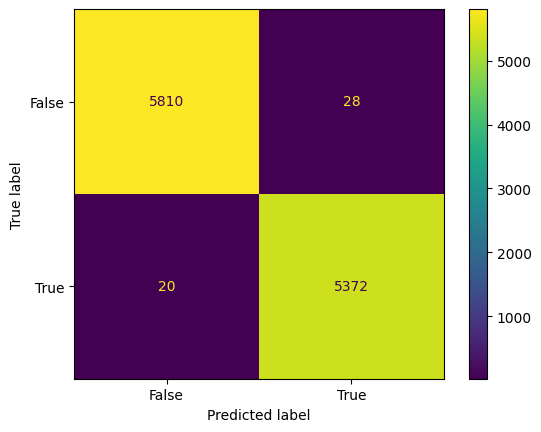

In [31]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

Training Accuracy: 0.96
Testing Accuracy: 0.95


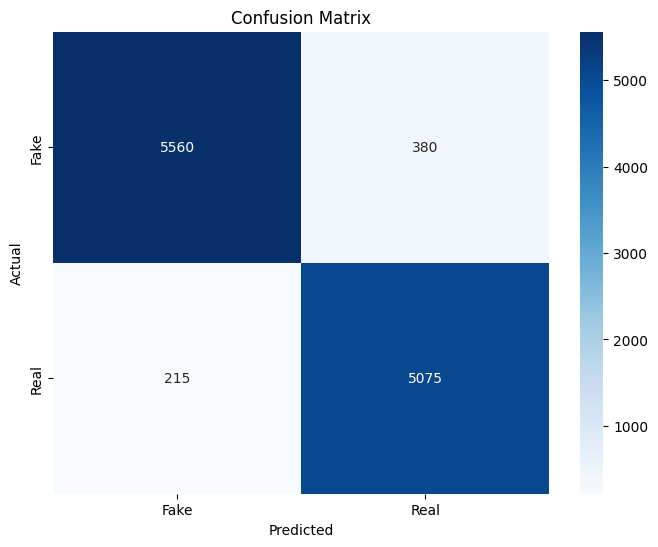

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'text' and 'class' columns
x = data['text']
y = data['class']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Convert text data to numerical features
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(x_train, y_train)

# Test the model and print accuracy
print(f"Training Accuracy: {accuracy_score(y_train, model.predict(x_train)):.2f}")
print(f"Testing Accuracy: {accuracy_score(y_test, model.predict(x_test)):.2f}")

# Predict on the test set
y_pred = model.predict(x_test) #This line is crucial; it ensures y_pred is calculated for the current x_test

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

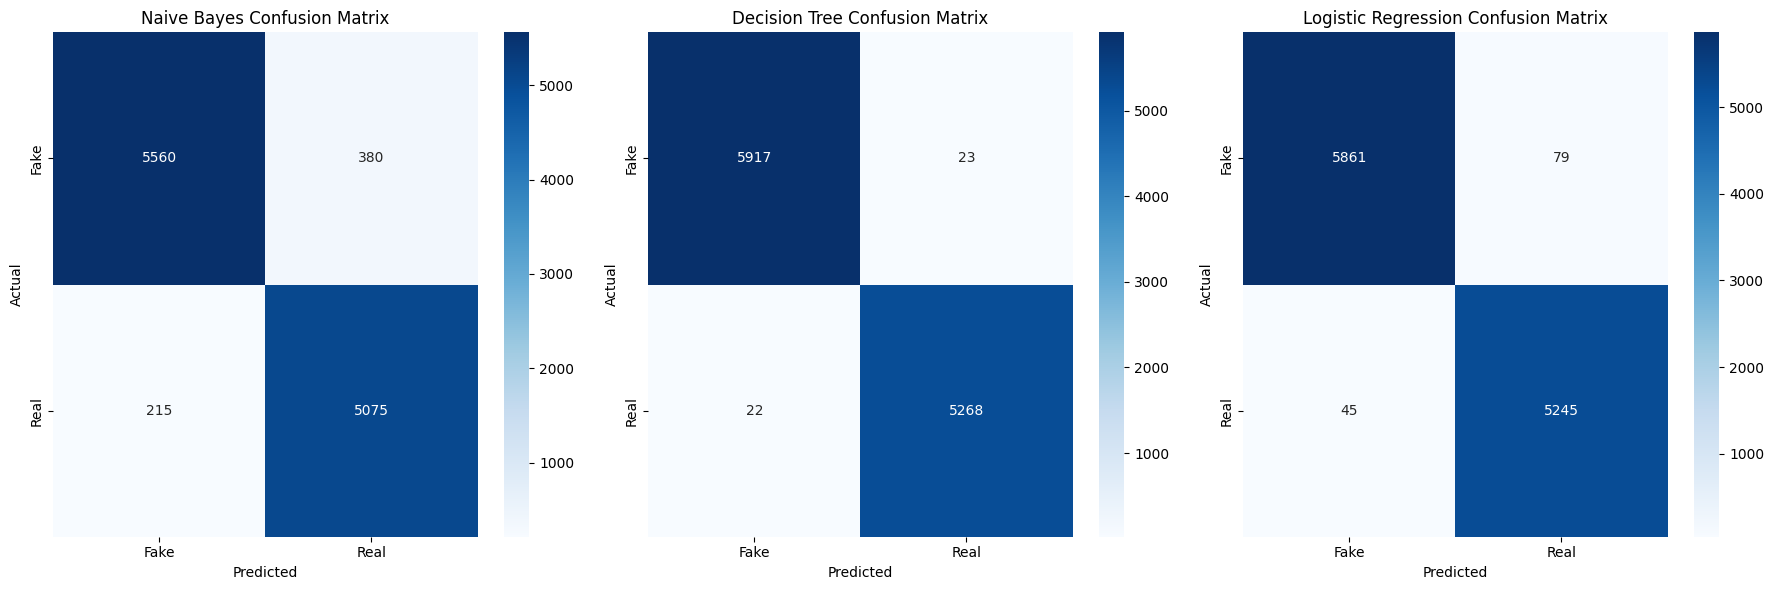

In [40]:
# Predictions for confusion matrices
nb_model = model
nb_pred = nb_model.predict(x_test)

# Similarly, assign the other models to corresponding variables
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
dt_pred = dt_model.predict(x_test)
lr_pred = lr_model.predict(x_test)
nb_cm = confusion_matrix(y_test, nb_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"], ax=axes[0])
axes[0].set_title("Naive Bayes Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"], ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"], ax=axes[2])
axes[2].set_title("Logistic Regression Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [41]:
print(f"Naive Bayes - Training Accuracy: {nb_train_acc:.2f}, Testing Accuracy: {nb_test_acc:.2f}")
print(f"Decision Tree - Training Accuracy: {dt_train_acc:.2f}, Testing Accuracy: {dt_test_acc:.2f}")
print(f"Logistic Regression - Training Accuracy: {lr_train_acc:.2f}, Testing Accuracy: {lr_test_acc:.2f}")


NameError: name 'nb_train_acc' is not defined

In [46]:
# Calculate accuracy scores for each model
nb_train_acc = accuracy_score(y_train, nb_model.predict(x_train))  # Naive Bayes training accuracy
nb_test_acc = accuracy_score(y_test, nb_pred)  # Naive Bayes testing accuracy

dt_train_acc = accuracy_score(y_train, dt_model.predict(x_train))  # Decision Tree training accuracy
dt_test_acc = accuracy_score(y_test, dt_pred)  # Decision Tree testing accuracy

lr_train_acc = accuracy_score(y_train, lr_model.predict(x_train))  # Logistic Regression training accuracy
lr_test_acc = accuracy_score(y_test, lr_pred)  # Logistic Regression testing accuracy

# Displaying the accuracy scores
print(f"Naive Bayes - Training Accuracy: {nb_train_acc:.2f}, Testing Accuracy: {nb_test_acc:.2f}")
print(f"Decision Tree - Training Accuracy: {dt_train_acc:.2f}, Testing Accuracy: {dt_test_acc:.2f}")
print(f"Logistic Regression - Training Accuracy: {lr_train_acc:.2f}, Testing Accuracy: {lr_test_acc:.2f}")


Naive Bayes - Training Accuracy: 0.96, Testing Accuracy: 0.95
Decision Tree - Training Accuracy: 1.00, Testing Accuracy: 1.00
Logistic Regression - Training Accuracy: 0.99, Testing Accuracy: 0.99


In [47]:
from sklearn.metrics import classification_report

# Display classification report for each model
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))



Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5940
           1       0.93      0.96      0.94      5290

    accuracy                           0.95     11230
   macro avg       0.95      0.95      0.95     11230
weighted avg       0.95      0.95      0.95     11230


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5940
           1       1.00      1.00      1.00      5290

    accuracy                           1.00     11230
   macro avg       1.00      1.00      1.00     11230
weighted avg       1.00      1.00      1.00     11230


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5940
           1       0.99      0.99      0.99      5290

    accuracy                           0.99     11230
   macro a

In [48]:
from sklearn.model_selection import cross_val_score

# Evaluate cross-validation scores
nb_cv_scores = cross_val_score(nb_model, x_train, y_train, cv=5)
dt_cv_scores = cross_val_score(dt_model, x_train, y_train, cv=5)
lr_cv_scores = cross_val_score(lr_model, x_train, y_train, cv=5)

print(f"\nNaive Bayes Cross-Validation Scores: {nb_cv_scores}")
print(f"Decision Tree Cross-Validation Scores: {dt_cv_scores}")
print(f"Logistic Regression Cross-Validation Scores: {lr_cv_scores}")



Naive Bayes Cross-Validation Scores: [0.94775898 0.94464233 0.95028198 0.94568121 0.94864183]
Decision Tree Cross-Validation Scores: [0.99688335 0.99599288 0.99539923 0.99450876 0.99525011]
Logistic Regression Cross-Validation Scores: [0.98797863 0.98604927 0.98872069 0.98693974 0.98782841]


**Conclusion:**

Decision Tree has the highest accuracy on both the training and testing sets, with 1.00 in both cases. This suggests that the model is overfitting the training data since it has perfect accuracy on the training set.

Logistic Regression performs very well with 0.99 accuracy on both training and testing sets, indicating good generalization and no significant overfitting.

Naive Bayes has slightly lower accuracy but still performs well with 0.95 testing accuracy, which could indicate it’s more robust to noise or better suited for the underlying data structure
